## CNN BINARY CLASSIFICATION

 here we are gonna develop a CNN(Convolutional neural network) innordered to classify the image as pizza and stake. for developing an neural network we need to go through several steps which are
   * Download the data
   * Inspect the data
   * create a model

because convolutional neural networks work so well with images,  we're going to start with a dataset of images.

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.which is already preprossesed .we will cover that on other notebook

the processed dataset is from [food_data](https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip)

In [20]:
import os
print(os.getcwd())

d:\CNN-BINARY-CLASSIFICATION-PROJECT


In [ ]:
import wget

# URL of the file to download
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"

# File name to save the downloaded file
file_name = "pizza_steak.zip"

# Download the file
wget.download(url, file_name)

print("File downloaded successfully.")

In [ ]:
import zipfile

 #zip file download
zip_file=zipfile.ZipFile("pizza_steak.zip")
zip_file.extractall()
zip_file.close()

## INSPECT THE DATA

In [22]:
ls pizza_steak

 Volume in drive D is DATA 
 Volume Serial Number is 5C9B-9586

 Directory of d:\CNN-BINARY-CLASSIFICATION-PROJECT\pizza_steak

04/15/2024  10:27 PM    <DIR>          .
04/23/2024  07:20 PM    <DIR>          ..
04/15/2024  10:27 PM    <DIR>          test
04/15/2024  10:27 PM    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  147,237,830,656 bytes free


In [23]:
import os

content=os.listdir("pizza_steak/train/")
print(content)

['pizza', 'steak']


In [24]:
ls D:\CNN-BINARY-CLASSIFICATION-PROJECT\pizza_steak\train\steak

 Volume in drive D is DATA 
 Volume Serial Number is 5C9B-9586

 Directory of D:\CNN-BINARY-CLASSIFICATION-PROJECT\pizza_steak\train\steak

04/15/2024  10:27 PM    <DIR>          .
04/15/2024  10:27 PM    <DIR>          ..
04/15/2024  10:27 PM            36,185 1000205.jpg
04/15/2024  10:27 PM            34,497 100135.jpg
04/15/2024  10:27 PM           116,802 101312.jpg
04/15/2024  10:27 PM            56,754 1021458.jpg
04/15/2024  10:27 PM            34,143 1032846.jpg
04/15/2024  10:27 PM            24,688 10380.jpg
04/15/2024  10:27 PM            37,134 1049459.jpg
04/15/2024  10:27 PM            49,841 1053665.jpg
04/15/2024  10:27 PM            59,983 1068516.jpg
04/15/2024  10:27 PM            28,996 1068975.jpg
04/15/2024  10:27 PM            29,525 1081258.jpg
04/15/2024  10:27 PM            49,577 1090122.jpg
04/15/2024  10:27 PM            59,976 1093966.jpg
04/15/2024  10:27 PM            60,253 1098844.jpg
04/15/2024  10:27 PM            69,843 1100074.jpg
04/15/2024  10:2

In [25]:
for dirpath ,dirname,file_name in os.walk("pizza_steak"):
    print(f"there are {len(dirname)} directories and {len(file_name)} images in '{dirpath}")

there are 2 directories and 0 images in 'pizza_steak
there are 2 directories and 0 images in 'pizza_steak\test
there are 0 directories and 250 images in 'pizza_steak\test\pizza
there are 0 directories and 250 images in 'pizza_steak\test\steak
there are 2 directories and 0 images in 'pizza_steak\train
there are 0 directories and 750 images in 'pizza_steak\train\pizza
there are 0 directories and 750 images in 'pizza_steak\train\steak


## visualize visualize visualize
we have to visualize the data we have loaded by using matplotlib
 

In [26]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [27]:
#create an function for visulaize the image
def show_the_image(directory,class_name):
    "by taking input dirctory_name,Class_name randomly generate the image"
    directory_folder=directory+class_name
    #generate  random images
    random_images=random.sample(os.listdir(directory_folder),1)
    #show the image
    img=mpimg.imread(directory_folder+"/"+random_images[0])
    plt.imshow(img)
    plt.axis("off")
    plt.title(class_name)
    #the the shape of image and name
    print(f"image shape: {img.shape} Name:{class_name}")
    

image shape: (512, 512, 3) Name:pizza


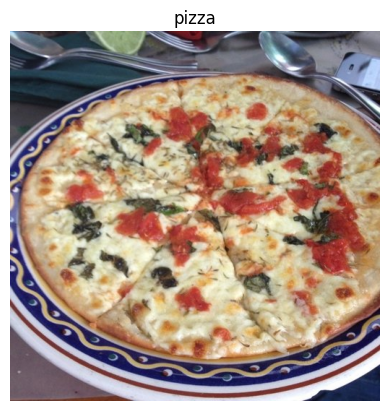

In [28]:
show_the_image("pizza_steak/train/","pizza")

## Now  create a cnn model

In [31]:
#importing necessary library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set random seed
tf.random.set_seed(42)

#preprocess the data and set between (0 to 1)
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

#setup the path of directory

train_dir="pizza_steak/train/"
test_dir ="pizza_steak/test/"

# import data from directory

train_data=train_datagen.flow_from_directory(train_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           seed=42)

valid_data=test_datagen.flow_from_directory(test_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           seed=42)

## create a model

model1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3),
                           ),
    tf.keras.layers.MaxPool2D(pool_size=3,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),   
    tf.keras.layers.MaxPool2D(3,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
#fit the model
history_1 = model1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data) // 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.6586 - loss: 0.6270 - val_accuracy: 0.8140 - val_loss: 0.4529
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8140 - val_loss: 0.4529
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.7875 - loss: 0.4796 - val_accuracy: 0.8140 - val_loss: 0.3982
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8140 - val_loss: 0.3982
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.8261 - loss: 0.4166 - val_accuracy: 0.8300 - val_loss: 0.3895


# now lets check out of our model summary

In [33]:
# Check out the layers in our model
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 74, 74, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 72, 72, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 24, 24, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 22, 22, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         4,841 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,825 (81.35 KB)

 Trainable params: 6,941 (27.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,884 (54.24 KB)

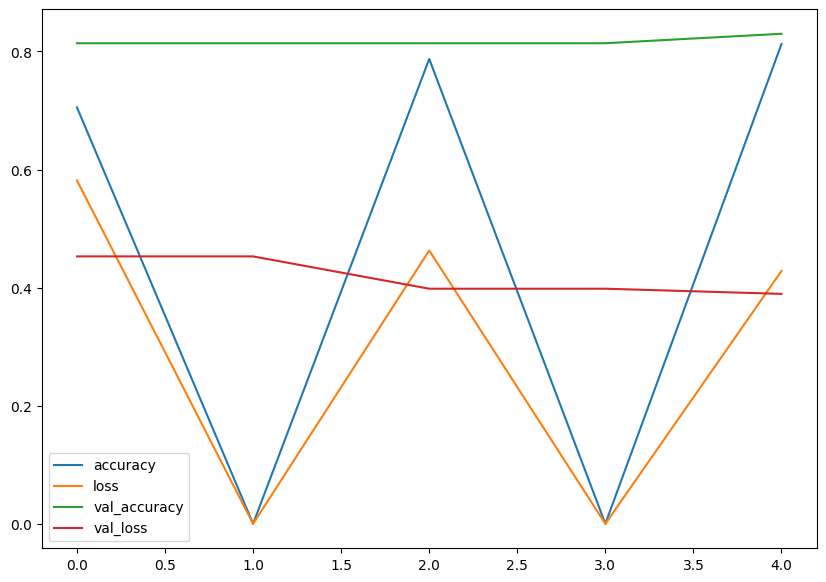

In [36]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));